Version 1.0.1

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [2]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [3]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [4]:
# YOUR CODE GOES HERE
print(f'transactions: {transactions.shape}')
print(f'shops: {shops.shape}')
print(f'items: {items.shape}')
print(f'item_cats: {item_categories.shape}')

transactions: (2935849, 6)
shops: (60, 2)
items: (22170, 3)
item_cats: (84, 2)


In [5]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [6]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [7]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [8]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [9]:
transactions.date[:].values[0].split('.')[2]

'2013'

In [10]:
transactions.insert(1, column='Year', value=[i.split('.')[2] for i in transactions.date.values ])

In [11]:
transactions.insert(1, column='Month', value=[i.split('.')[1] for i in transactions.date.values ])

In [12]:
transactions.insert(1, column='Day', value=[i.split('.')[0] for i in transactions.date.values ])

In [13]:
transactions.head()

,date,Day,Month,Year,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,02,01,2013,0,59,22154,999.00,1.0
1,03.01.2013,03,01,2013,0,25,2552,899.00,1.0
2,05.01.2013,05,01,2013,0,25,2552,899.00,-1.0
3,06.01.2013,06,01,2013,0,25,2554,1709.05,1.0
4,15.01.2013,15,01,2013,0,25,2555,1099.00,1.0


Sales in sept 2014

In [14]:
sales_sep_2014 = transactions.loc[(transactions.Month == '09') & (transactions.Year == '2014')]

In [15]:
sales_sep_2014.head()

,date,Day,Month,Year,date_block_num,shop_id,item_id,item_price,item_cnt_day
1953691,24.09.2014,24,09,2014,20,5,1039,899.0,1.0
1953692,27.09.2014,27,09,2014,20,5,1015,449.0,1.0
1953693,07.09.2014,07,09,2014,20,5,1329,399.0,1.0
1953694,27.09.2014,27,09,2014,20,5,984,399.0,1.0
1953695,08.09.2014,08,09,2014,20,5,984,399.0,1.0


In [16]:
shop_id = list(set(sales_sep_2014.shop_id))

In [17]:
from collections import defaultdict

In [18]:
np.dot(sales_sep_2014.loc[sales_sep_2014.shop_id==5]['item_price'].values, sales_sep_2014.loc[sales_sep_2014.shop_id==5]['item_cnt_day'].values)

1350828.019999971

In [19]:
shop_revenue = defaultdict(int)
for i in shop_id:
    shop_revenue[i] = np.dot(sales_sep_2014.loc[sales_sep_2014.shop_id==i]['item_price'].values, sales_sep_2014.loc[sales_sep_2014.shop_id==i]['item_cnt_day'].values) 

In [24]:
max(shop_revenue.values())

7982852.199999957

In [25]:
# YOUR CODE GOES HERE

max_revenue = 7982852.199999957# PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.199999957


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [112]:
transactions.head()

,date,Day,Month,Year,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,02,01,2013,0,59,22154,999.00,1.0
1,03.01.2013,03,01,2013,0,25,2552,899.00,1.0
2,05.01.2013,05,01,2013,0,25,2552,899.00,-1.0
3,06.01.2013,06,01,2013,0,25,2554,1709.05,1.0
4,15.01.2013,15,01,2013,0,25,2555,1099.00,1.0


In [128]:
summer = ['06','07','08']

In [129]:
sales_summer_2014 = transactions.loc[(transactions['Month'].isin(summer)) & (transactions.Year == '2014')]

In [130]:
set(sales_summer_2014.Month)

{'06', '07', '08'}

In [131]:
item_id = list(set(sales_summer_2014.item_id))

In [132]:
id_revenue = defaultdict(int)
for i in item_id:
    id_revenue[i] = np.dot(sales_summer_2014.loc[sales_summer_2014.item_id==i]['item_price'].values, sales_summer_2014.loc[sales_summer_2014.item_id==i]['item_cnt_day'].values) 

In [126]:
id_revenue

defaultdict(int,
            {1: 4490.0,
             3: 100.0,
             6: 100.0,
             27: 1494.0,
             30: 4324.0,
             31: 10527.039999999997,
             32: 5440.0,
             33: 6965.0,
             34: 298.0,
             36: 149.0,
             37: 1192.0,
             38: 8783.0,
             40: 1245.0,
             42: 2093.0,
             44: 2220.0,
             45: 3456.0,
             46: 249.0,
             48: 996.0,
             49: 4186.0,
             51: 4784.0,
             52: 897.0,
             53: 4783.7,
             55: 996.0,
             57: 2128.0,
             59: 3735.0,
             62: 499.0,
             65: 798.0,
             66: 399.0,
             71: 2994.0,
             72: 476.0,
             74: 2495.0,
             75: 447.0,
             76: 49079.5,
             77: 104971.3,
             85: 725.06,
             87: 2495.0,
             88: 149.0,
             93: 996.0,
             96: 149.0,
            

In [118]:
np.argmax(list(id_revenue.values()))

2223

In [133]:
items.values

array([['! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D', 0, 40],
       ['!ABBYY FineReader 12 Professional Edition Full [PC, Цифровая версия]',
        1, 76],
       ['***В ЛУЧАХ СЛАВЫ   (UNV)                    D', 2, 40],
       ...,
       ['Язык запросов 1С:Предприятия 8 (+CD). Хрусталева Е.Ю.', 22167,
        49],
       ['Яйцо для Little Inu', 22168, 62],
       ['Яйцо дракона (Игра престолов)', 22169, 69]], dtype=object)

In [136]:
items_in_category = defaultdict(list)
for row in items.values:
    if row[-2] in item_id:
        items_in_category[row[-1]].append(row[-2])
    else:
        continue

In [138]:
items_in_category[12]

[6675, 13444]

In [141]:
category_revenue = defaultdict(int)
cate = list(items_in_category.keys())
for c in cate:
    for i in items_in_category[c]:
        category_revenue[c] += id_revenue[i]

In [143]:
np.argmax(list(category_revenue.values()))

27

In [144]:
(list(category_revenue.keys()))[27]

20

array([12])

In [145]:
# YOUR CODE GOES HERE

category_id_with_max_revenue = 20
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [93]:
transactions.columns

Index(['date', 'Day', 'Month', 'Year', 'date_block_num', 'shop_id', 'item_id',
       'item_price', 'item_cnt_day'],
      dtype='object')

In [94]:
item_ids = list(set(transactions.item_id))

In [95]:
price_id = defaultdict(list)

In [96]:
for row in transactions.values:
    price_id[row[-3]].append(row[-2])

In [97]:
constants = 0
for key in price_id:
    if set(price_id[key]) == {price_id[key][0]}:
        constants += 1
    else:
        continue

In [98]:
constants

5926

In [99]:
len(price_id.keys())

21807

In [100]:
# YOUR CODE GOES HERE

num_items_constant_price = 5926 # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014?</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`).

In [101]:
sales_in_dec_2014_shop_25 = transactions.loc[((transactions.Month == '12') & (transactions.Year == '2014')) & (transactions.shop_id == 25)]

In [102]:
sales_in_dec_2014_shop_25.head()

,date,Day,Month,Year,date_block_num,shop_id,item_id,item_price,item_cnt_day
2295837,14.12.2014,14,12,2014,23,25,21752,399.0,1.0
2295838,13.12.2014,13,12,2014,23,25,21752,399.0,3.0
2295839,26.12.2014,26,12,2014,23,25,21733,149.0,1.0
2295840,31.12.2014,31,12,2014,23,25,21732,149.0,1.0
2295841,30.12.2014,30,12,2014,23,25,21726,149.0,1.0


In [103]:
sales_in_dec_2014_shop_25.values[:5]

array([['14.12.2014', '14', '12', '2014', 23, 25, 21752, 399.0, 1.0],
       ['13.12.2014', '13', '12', '2014', 23, 25, 21752, 399.0, 3.0],
       ['26.12.2014', '26', '12', '2014', 23, 25, 21733, 149.0, 1.0],
       ['31.12.2014', '31', '12', '2014', 23, 25, 21732, 149.0, 1.0],
       ['30.12.2014', '30', '12', '2014', 23, 25, 21726, 149.0, 1.0]],
      dtype=object)

In [105]:
sales_per_day = defaultdict(int)
for day in sales_in_dec_2014_shop_25.values:
    sales_per_day[int(day[1])] += int(day[-1])
    
    

In [106]:
sales_per_day

defaultdict(int,
            {14: 305,
             13: 432,
             26: 620,
             31: 776,
             30: 1966,
             23: 371,
             20: 579,
             19: 418,
             9: 204,
             25: 505,
             21: 379,
             7: 325,
             6: 350,
             17: 285,
             28: 662,
             16: 192,
             4: 164,
             27: 743,
             1: 153,
             24: 433,
             22: 318,
             2: 169,
             12: 297,
             5: 300,
             15: 225,
             8: 209,
             18: 325,
             3: 195,
             11: 214,
             10: 143})

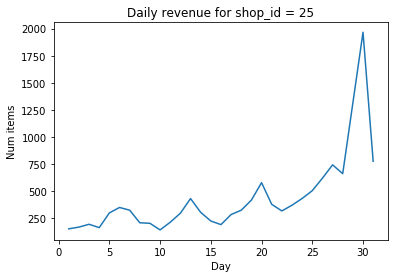

In [107]:
shop_id = 25
days = sorted(list(sales_per_day.keys()))
total_num_items_sold = [sales_per_day[i] for i in days]# YOUR CODE GOES HERE
# YOUR CODE GOES HERE

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

In [109]:
total_num_items_sold_var = np.var(total_num_items_sold, ddof=1)# PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

Current answer for task total_num_items_sold_var is: 117167.70229885059


## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [146]:
STUDENT_EMAIL = 'Email'
STUDENT_TOKEN = 'token'
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.199999957
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.70229885059


In [147]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)